# **PRATICANDO DEEP LEARNING COM KERAS**

1. Importar o tensorflow
2. Importar o keras que fica dentro do tensorflow
3. Carregar o dataset e dividir os array em treino e teste.





#Importar

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

#Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

#Exeplorar os dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

#Exbir os dados

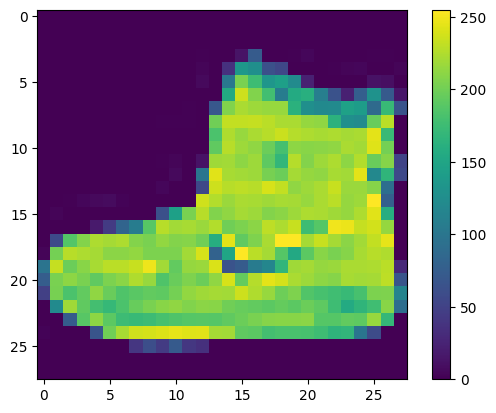

In [4]:
total_de_classsificacoes = 10
nomes_de_Classificacoes = ['Camiseta', 'Calça', 'pullover', 'Vestido', 'Casaco',
                         'Sandália', 'Camisa','Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
for  imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_Classificacoes [identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

#Normalizando as Imagens


In [16]:
imagens_treino = imagens_treino/float(255)

#Criando, Compilando, treinando e normalizando o modelo

In [17]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=6, validation_split=0.2)

Epoch 1/6
1500/1500 [==============================] - 11s 7ms/step - loss: 1.0742 - accuracy: 0.6622 - val_loss: 0.6880 - val_accuracy: 0.7521
Epoch 2/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6484 - accuracy: 0.7637 - val_loss: 0.5850 - val_accuracy: 0.7835
Epoch 3/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5734 - accuracy: 0.7945 - val_loss: 0.5316 - val_accuracy: 0.8088
Epoch 4/6
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5281 - accuracy: 0.8114 - val_loss: 0.4992 - val_accuracy: 0.8208
Epoch 5/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5015 - accuracy: 0.8207 - val_loss: 0.4791 - val_accuracy: 0.8276
Epoch 6/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4792 - accuracy: 0.8302 - val_loss: 0.4615 - val_accuracy: 0.8345


#Salvando o Modelo

In [20]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

#Visualizando as acurácias e validação por época

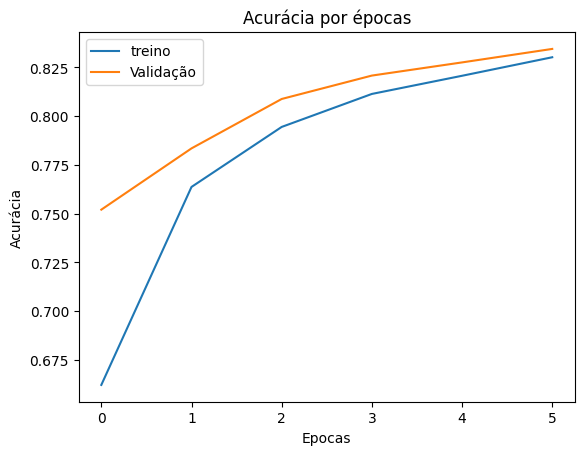

In [18]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Epocas')
plt.ylabel('Acurácia')
plt.legend(['treino',  'Validação'])

#Visualizando as perda e validação por época

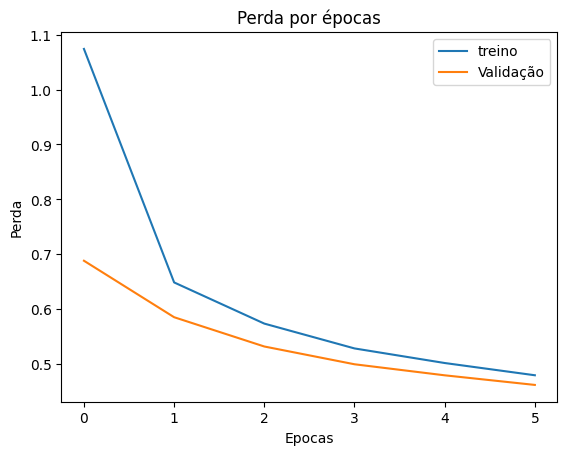

In [19]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Epocas')
plt.ylabel('Perda')
plt.legend(['treino',  'Validação'])

#Testando o modelo eo modelo salvo

In [21]:
teste = modelo.predict(imagens_teste)
print('Resultado teste: ',np.argmax(teste[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultados teste modelo salvo ', np.argmax(testes_modelo_salvo[1]))
print ('Número da image de teste', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
Resultado teste:  2
Número da imagem de teste:  2
313/313 [==============================] - 1s 2ms/step
Resultados teste modelo salvo  2
Número da image de teste 2


#Avaliando o modelo

In [22]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

print('Perda do teste ', perda_teste)
print('Acurácia do teste', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 19632.6797 - accuracy: 0.6932
Perda do teste  19632.6796875
Acurácia do teste 0.6931999921798706
